## Final Project Submission
***

Please fill out:
* Student name: Marife Ramoran
* Student pace: 
* Scheduled project review date/time: 15th October 2023
* Instructor name: Hardik Idnani
* Blog post URL: 


## Overview
***
This project involves the analysis of data to fulfill Microsoft's objective of producing a highly successful movie. By conducting a descriptive examination of movies from the past century, we aim to identify recurring patterns that contribute to the formula for a blockbuster film. Microsoft can then leverage this analysis to track trends and understand the key factors behind the success of blockbuster movies.

## Business Problem
***
Microsoft has taken notice of major corporations venturing into the realm of producing unique video content, and they are eager to join the fray. As part of this endeavor, Microsoft has made the strategic decision to establish a brand-new film studio. However, they currently lack expertise in the field of filmmaking. Your role involves conducting research to identify the most successful film genres currently dominating the box office. Subsequently, you will be tasked with transforming this research into practical recommendations that can guide the head of Microsoft's newly established movie studio in making informed decisions about the types of films to produce.

![clapper](clapper.gif)


In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# You can execute your code here to investigate the data.
title_basic_df = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
title_rating_df = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
bom_movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

## Data Preparation
Explain and provide details of the procedure taken to get the data ready for analysis.
***

### Questions:
1. How did you resolve missing values or outliers?
2. Did you eliminate or introduce any variables?
3. Why do these selections align with the data and the business issue at hand?



In [3]:
# Run this code to clean the data
rating_basic_df = pd.merge(title_basic_df, title_rating_df,on = ['tconst'] ,how = 'inner')

In [4]:
# Run this code to identify how many datas are missing on rating_basic_df
rating_basic_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [5]:
# I will create a new DataFrame variable to display the outcome.
rating_basic_filled_df = rating_basic_df

In [6]:
# I need to convert the data type to a float so that I can perform numerical operations on it.
rating_basic_filled_df['runtime_minutes'] = pd.to_numeric(rating_basic_filled_df['runtime_minutes'])

In [7]:
# Now that the data is in a format I can work with, I will replace the missing values in the `runtime_m` column with its median.
rating_basic_filled_df['runtime_minutes'] = rating_basic_df['runtime_minutes'].fillna(rating_basic_df['runtime_minutes'].median())

In [8]:
# I am renaming the 'primary_title' column in the `rating_basic_filled_df` DataFrame to 'title' to facilitate its merging with another dataset.
rating_basic_filled_df.rename(columns = {'primary_title':'title'}, inplace= True)

## Data Merging
***

In [9]:
# We can begin by merging the bom_movie_gross_df and movie_budget_df datasets, but before doing so, we should first rename them.
movie_budget_df.rename(columns = {'movie':'title'}, inplace = True)
movie_gross_budget_df = pd.merge(bom_movie_gross_df, movie_budget_df, on = ['title'] ,how = 'inner')
merged_df = pd.merge(movie_gross_budget_df, rating_basic_filled_df, on = ['title'], how = 'inner')

In [10]:
# I want to remove any duplicates that share the same title and release date while retaining at least one of them.
merged_df = merged_df.drop_duplicates(subset= ['title', 'release_date'], keep = 'first')

In [11]:
# This error appeared as an issue that requires resolution before we can proceed with converting the foreign_gross into an int
merged_df[merged_df['foreign_gross'] == '1,019.4']
merged_df[merged_df['foreign_gross'] == '1,163.0']
merged_df[merged_df['foreign_gross'] == '1,010.0']
merged_df[merged_df['foreign_gross'] == '1,369.5']

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1302,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,7,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [12]:

# Now we need to address and resolve the error
merged_df['foreign_gross'][824] = '1017600000'
merged_df['foreign_gross'][825] = '1163000000'
merged_df['foreign_gross'][1170] = '1010000000'
merged_df['foreign_gross'][1302] = '1369500000'


/var/folders/zr/m5b0ldvs7695p_h8w70ndwc40000gn/T/ipykernel_26664/3024590889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['foreign_gross'][825] = '1163000000'
/var/folders/zr/m5b0ldvs7695p_h8w70ndwc40000gn/T/ipykernel_26664/3024590889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['foreign_gross'][1170] = '1010000000'
/var/folders/zr/m5b0ldvs7695p_h8w70ndwc40000gn/T/ipykernel_26664/3024590889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [13]:
# Now, it's possible to modify the data type of the 'foreign_gross' column to int
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'])

In [14]:
# As certain foreign gross data was absent, I filled it using the median value from movies produced in the last century.
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(value = merged_df['foreign_gross'].median())

## Data Cleaning
***

In [15]:
# I would like to eliminate the comma with the genre
def split_comma(x):
    return x.split(",")

In [16]:
# I need to determine whether there is any missing data in the genres column
merged_df['genres'].isna().sum()

1

In [17]:
# I have identified 1 missing data where we can choose between dropping it or filling it
# In this scenario, I have filled it with "missing" since it should have minimal impact on the overall data
merged_df['genres'] = merged_df['genres'].fillna (value = 'missing')

In [18]:
# In here, I am using the map method to remove the comma
merged_df['genres'] = merged_df ['genres'].map(split_comma)

In [19]:
# I am defining another function to remove the dollar sign and commas from the production_budget
def remove_dollar_comma(x):
    x = x.replace("," , "")
    return x.replace("$", "")

In [20]:
# Using the new function that was created, we can now proceed with converting the data type to int
merged_df['production_budget'] = merged_df['production_budget'].map(remove_dollar_comma)

In [21]:
# We can now change the type of column production_budget to int
merged_df['production_budget'] = pd.to_numeric(merged_df['production_budget'])

## Feature Engineering
***

In [22]:
# I intend to remove the existing 'worldwide_gross' column
# then create a new one to be accurate especially in cases where there might be missing values
# This will produce consistent data
merged_df.drop("worldwide_gross", axis = 1)

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",200000000,"$415,004,880",tt0435761,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",160000000,"$292,576,195",tt1375666,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",165000000,"$238,736,787",tt0892791,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",68000000,"$300,531,751",tt1325004,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",170000000,"$312,433,331",tt1228705,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Destroyer,Annapurna,1500000.0,4000000.0,2018,5,"Dec 25, 2018",9000000,"$1,533,324",tt7137380,Destroyer,2018,121.0,"[Action, Crime, Drama]",6.2,13683
1408,Gotti,VE,4300000.0,43000000.0,2018,64,"Jun 15, 2018",10000000,"$4,286,367",tt1801552,Gotti,2018,112.0,"[Biography, Crime, Drama]",4.8,10358
1409,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,100,"Feb 2, 2018",30000000,"$490,973",tt3576728,Bilal: A New Breed of Hero,2015,105.0,"[Action, Adventure, Animation]",8.0,16854
1410,Mandy,RLJ,1200000.0,43000000.0,2018,71,"Sep 14, 2018",6000000,"$1,214,525",tt4995858,Mandy,2016,113.0,"[Drama, Thriller]",4.1,39


In [23]:
# I want to calculate the global earnings and place them in a new column labeled 'worldwide_gross'
# This represents the total of both 'domestic_gross' and 'foreign_gross'
merged_df['worldwide_gross'] = merged_df['domestic_gross_x'] + merged_df['foreign_gross']

In [24]:
# I want to create a new column that is called 'blockbuster' that will output True or False
# A straightforward criterion for this would be if the overall budget, 
# contains all expenses from production to marketing, qualifies the movie as a success.
merged_df['blockbuster'] = (merged_df['worldwide_gross']) >= (2 * merged_df['production_budget'])

In [25]:
# I want to refine the selection to include only the movies classified as blockbusters
# then arrange them based on their global earnings
blockbusters_df = merged_df[merged_df['blockbuster'] == True]
blockbusters_sort_df = blockbusters_df.sort_values(['worldwide_gross'], ascending = False)

In [26]:
# I want to isolate studio and calculate the 'worldwide_gross' 
top_studios = blockbusters_sort_df.groupby('studio')['worldwide_gross'].sum()

In [27]:
studio_totals_df = top_studios.reset_index()

In [28]:
# I want to sort out the value of 'worldwide_gross'
studio_name = studio_totals_df.sort_values(['worldwide_gross'], ascending= True)

In [29]:
studio_name.tail(10)

,studio,worldwide_gross
70,Wein.,2.605300e+09
44,P/DW,4.967600e+09
32,LGF,6.136418e+09
68,WB (NL),8.110400e+09
47,Par.,1.220320e+10
58,Sony,1.588030e+10
67,WB,1.824430e+10
22,Fox,2.392370e+10
64,Uni.,2.520552e+10
9,BV,3.027660e+10


In [30]:
replacements = {'Wein.': 'Weinstein', 'P/DW': '20th Century', 'LGF': 'Lions Gate',
                'WB (NL)': 'Warner Bros (NL)', 'Par.': 'Paramount', 'Sony': 'Sony',
                'WB': 'WB', 'Fox': 'Fox', 'Uni.': 'Universal', 'BV': 'Buena Vista'}

for key, value in replacements.items():
    studio_name['studio'] = studio_name['studio'].replace(key, value)

In [31]:
# I want to split the genres using explode method
top_genres = blockbusters_sort_df.explode('genres')

In [32]:
# I want to isolate genre and calculate the 'worldwide_gross'
genre_totals = top_genres.groupby('genres')['worldwide_gross'].sum()

In [33]:
genre_totals_df = genre_totals.reset_index()

In [34]:
# I want to sort the DataFrame in descending order by 'worldwide_gross
genre_totals_df_sorted = genre_totals_df.sort_values(by='worldwide_gross', ascending=False).head(10)

In [35]:
# I want to refine the selection to include only the genres as blockbusters
# then arrange them based on their global earnings
genre_totals_df_sorted = genre_totals_df_sorted.sort_values(by='worldwide_gross')

In [36]:
# I want to identify the films that generated the highest earnings.
top_10_num = blockbusters_sort_df.head(10).drop(['year','release_date', 'blockbuster', 'averagerating','genres', 'domestic_gross_y','tconst','original_title','start_year','id', 'year'], axis=1)

## Data Modelling
Explain and provide a rationale for the procedure employed in analyzing or constructing data models.
***
### Questions:

1. What methods were employed for data analysis or modeling?
2. How was the initial approach refined through iterations to enhance its effectiveness?
3.  How can these choices be justified in light of the data and the business problem at hand?

In [37]:
# Run the code to model the data
colors = ['navy', 'indigo', 'crimson', 'peru', 'silver', 'teal', 'olive', 'orchid', 'gray', 'magenta']

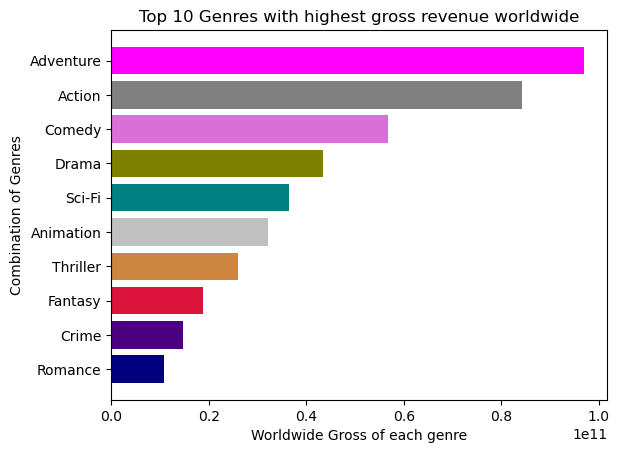

In [38]:
# I selected the top 10 genres to establish a foundational understanding of the most prolific genres in terms of production, 
# with the potential to earn the most revenue.
fig, ax = plt.subplots()
ax.barh(genre_totals_df_sorted['genres'].head(10), genre_totals_df_sorted['worldwide_gross'].head(10), color = colors)
ax.set_xlabel('Worldwide Gross of each genre')
ax.set_ylabel('Combination of Genres')
ax.set_title('Top 10 Genres with highest gross revenue worldwide')
plt.savefig(".\\image\\genres_bar.png", dpi=150, bbox_inches='tight')

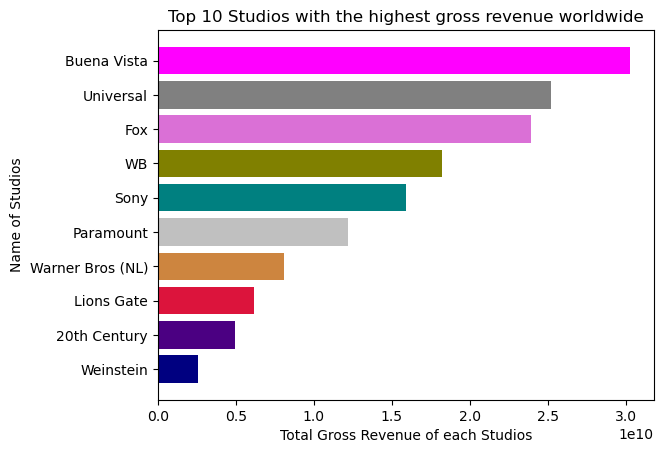

In [39]:
# I chose the top 10 Studios to determine which of them had produced a movie with the highest revenue,
# which could lead to potential collaborations in creating new, original content
fig, ax = plt.subplots()

ax.barh(studio_name['studio'].tail(10), studio_name['worldwide_gross'].tail(10), color = colors)
ax.set_xlabel('Total Gross Revenue of each Studios')
ax.set_ylabel('Name of Studios')
ax.set_title('Top 10 Studios with the highest gross revenue worldwide')

plt.savefig(".\image\studio_bar.png", dpi = 150, bbox_inches = 'tight')

plt.show()

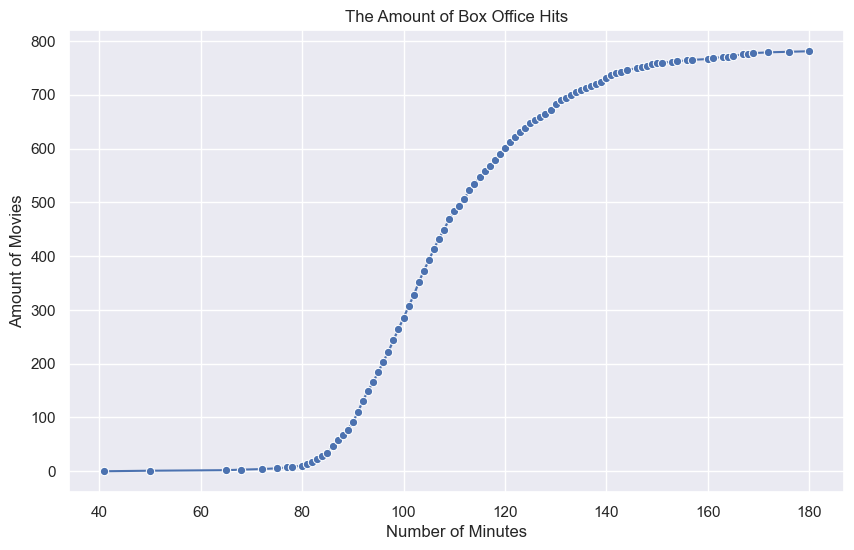

In [40]:
# Here is a breakdown of the number of movies and their typical runtime,
# which could influence viewers' decisions to watch these films
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.lineplot(x=sorted(blockbusters_df['runtime_minutes']), y=range(len(blockbusters_df)), marker='o')

plt.xlabel('Number of Minutes')
plt.ylabel('Amount of Movies')
plt.title('The Amount of Box Office Hits')


plt.savefig("numberminutes_line_seaborn.png", dpi=500, bbox_inches='tight')

plt.show()


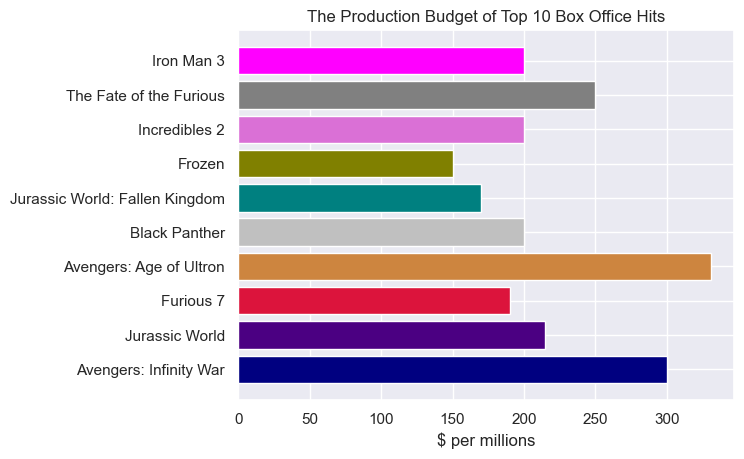

In [41]:
# Here is the chart displaying the production budget of the top 10 box office hits.

fig, ax = plt.subplots()

ax.barh(top_10_num['title'] ,list(top_10_num['production_budget']/1000000), color = colors)
ax.set_xlabel('$ per millions')
ax.set_title('The Production Budget of Top 10 Box Office Hits')

plt.savefig(".\image\production_budget_bar.png", dpi = 150, bbox_inches = 'tight')

plt.show()

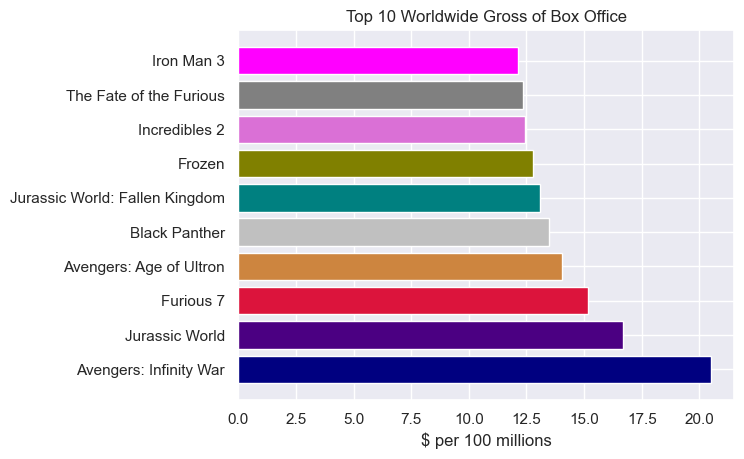

In [42]:
# Here is a chart that illustrates which titles generated the highest revenue.
fig, ax = plt.subplots()

ax.barh(top_10_num['title'] ,list(top_10_num['worldwide_gross']/100000000), color = colors)
ax.set_xlabel('$ per 100 millions')
ax.set_title('Top 10 Worldwide Gross of Box Office')

plt.savefig(".\image\worldwide_gross_bar.png", dpi = 150, bbox_inches = 'tight')

plt.show()

## Evaluation
Assess the effectiveness of your work in addressing the specified business problem.
***
### Questions 

1. How do you analyze the outcomes?
2. How effectively does your model align with the data?
3. To what extent does it outperform the baseline model?
4. How assured are you of the model's ability to generalize beyond the available data?
5. How convinced are you that implementing this model would be advantageous for the business?

***

Based on the provided data, we have valuable information to work with. We have insights into successful genres, optimal runtime, and an estimated production budget, which can help us approach the goal of achieving a position among the top 10 highest-grossing movies worldwide. I am confident that this data can serve as a helpful guide for creating a potential blockbuster hit.

## Conclusion 
Share your final remarks on the project, encompassing findings, constraints, and potential future actions.
***

1. What actions would you suggest the company take based on the outcomes of this project?
2. What are some factors that could limit the comprehensiveness of your analysis in addressing the business challenge?
3. What potential enhancements or strategies could be considered for future iterations of this project?
***


Based on this analysis, we propose three recommendations for Microsoft's movie studio's inaugural blockbuster film:

* Develop a movie that combines the genres of adventure, animation, and comedy, specifically a superhero-theme. These genres consistently perform well at the box office, with five of the top ten worldwide gross earners falling into the superhero category.

* Consider forming strategic partnerships with established studios like Universal Pictures. Buena Vista or 20th Century Fox, renowned for their extensive experience in film production and their track record of producing successful blockbusters.

* Aim for a movie duration within the 140 minute range and allocate a production budget in the range of 150 million to 300 million, which represents a reasonable maximum benchmark for investment.

## Progression plan
***

Future considerations involve the acquisition of additional data to assess the impact of influential directors, actors, and other crew members on the potential for blockbuster success.

Furthermore, we should explore predictive models for production delays that may impact the budget.

In addition, it's essential to maintain a proactive approach towards industry trends, ensuring timely adoption to capitalize on emerging concepts before their novelty diminishes. Given the time required for movie production, sustained relevance is critical for maximizing profits.